# Visualising ISS data starfish-decodings with napari

In [1]:
from starfish import Experiment
import os
import matplotlib
#import matplotlib.pyplot as plt
import numpy as np

from starfish import Experiment
from starfish.image import ApplyTransform, LearnTransform, Filter
from starfish.types import Axes
from starfish import data, FieldOfView
from starfish.spots import FindSpots
from starfish.util.plot import imshow_plane
from starfish.core.spots.DecodeSpots.trace_builders import build_spot_traces_exact_match

import napari

from dots_plot import *

#ROOT = '/Volumes/exchange/SebastianGonzalez/Sanjana'
#SAMPLE = 'Sample2_20220530'
#SPOTS = 'spots.csv'
#SPOTS_PATH = os.path.join(ROOT, SAMPLE, SPOTS)
#e = Experiment.from_json(os.path.join(ROOT, SAMPLE, 'SpaceTx/primary/experiment.json'))
e = Experiment

/Users/segonzal/opt/anaconda3/envs/starfish_napari/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
from starfish import Experiment
import napari

# Import ISS experiment:
e = Experiment.from_json('/Volumes/exchange/SebastianGonzalez/pag_2021/SpaceTx/primary/experiment.json')

e

ValueError: Not an absolute url.

## Let's visualise a single FOV

In [4]:
e.codebook

<xarray.Codebook (target: 9, r: 3, c: 3)>
array([[[1, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 1, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 1, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 1],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 1]]], dtype=uint8)
Coordinates:
  * target   (target) object 'Dppa4' 'Abca1' 'Lipg' ... 'Lars2' 'My166' 'Nr5a1'
  * r        (r) int64 0 1 2
  * c        (c) int64 0 1 2

In [50]:
# Load in situ sequencing experiment
from starfish.image import ApplyTransform, LearnTransform, Filter
from starfish.types import Axes
from starfish import data, FieldOfView
from starfish.spots import FindSpots, DecodeSpots
from starfish.util.plot import imshow_plane

import matplotlib.pyplot as plt

100%|██████████| 4/4 [00:00<00:00, 165.88it/s]


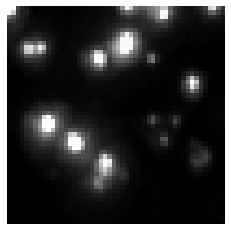

In [51]:
experiment = data.ISS()
fov = experiment.fov()
imgs = fov.get_image(FieldOfView.PRIMARY_IMAGES) # primary images
dots = fov.get_image("dots") # reference round where every spot labeled with fluorophore

# filter raw data
masking_radius = 15
filt = Filter.WhiteTophat(masking_radius, is_volume=False)
filt.run(imgs, in_place=True)
filt.run(dots, in_place=True)

# register primary images to reference round
learn_translation = LearnTransform.Translation(reference_stack=dots, axes=Axes.ROUND, upsampling=1000)
transforms_list = learn_translation.run(imgs.reduce({Axes.CH, Axes.ZPLANE}, func="max"))
warp = ApplyTransform.Warp()
warp.run(imgs, transforms_list=transforms_list, in_place=True)

# view dots to estimate radius of spots: radius range from 1.5 to 4 pixels
imshow_plane(dots, {Axes.X: (500, 550), Axes.Y: (600, 650)})

# run blob detector with dots as reference image
# following guideline of sigma = radius/sqrt(2) for 2D images
# threshold is set conservatively low
bd = FindSpots.BlobDetector(
    min_sigma=1,
    max_sigma=3,
    num_sigma=10,
    threshold=0.01,
    is_volume=False,
    measurement_type='mean',
)
spots = bd.run(image_stack=imgs, reference_image=dots)

# Decode the pixel traces using the codebook
decoder = DecodeSpots.PerRoundMaxChannel(codebook=experiment.codebook)
decoded = decoder.run(spots=spots)

In [4]:
# Plot this previous region for every round and every channel:


In [9]:
experiment

<starfish.Experiment (FOVs=16)>
{
fov_000: <starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (z: 1, r: 4, c: 4, x: 1390, y: 1044)>
  Auxiliary Images:
    nuclei: <slicedimage.TileSet (z: 1, r: 1, c: 1, x: 1390, y: 1044)>
    dots: <slicedimage.TileSet (z: 1, r: 1, c: 1, x: 1390, y: 1044)>
fov_001: <starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (z: 1, r: 4, c: 4, x: 1390, y: 1044)>
  Auxiliary Images:
    nuclei: <slicedimage.TileSet (z: 1, r: 1, c: 1, x: 1390, y: 1044)>
    dots: <slicedimage.TileSet (z: 1, r: 1, c: 1, x: 1390, y: 1044)>
fov_002: <starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (z: 1, r: 4, c: 4, x: 1390, y: 1044)>
  Auxiliary Images:
    nuclei: <slicedimage.TileSet (z: 1, r: 1, c: 1, x: 1390, y: 1044)>
    dots: <slicedimage.TileSet (z: 1, r: 1, c: 1, x: 1390, y: 1044)>
fov_003: <starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (z: 1, r: 4, c: 4, x: 1390, y: 1044)>
  Auxiliary Images:
    nuclei: <slicedimage.TileSet (

In [157]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

In [155]:
dir.scatter

AttributeError: 'builtin_function_or_method' object has no attribute 'scatter'

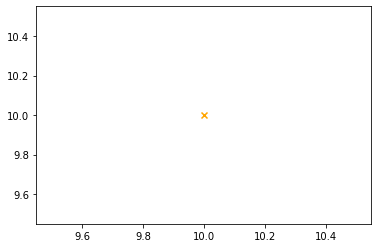

In [158]:
plt.scatter(10, 10, marker='x', c='orange')

In [179]:
def plot_trace(images, center, gene_barcode, width: int = 100, height: int = 100):
    num_rounds, num_channels = images.num_chs, images.num_rounds
    x_range = (int(center[0] - width / 2), int(center[0] + width / 2))
    y_range = (int(center[1] - height / 2), int(center[1] + height / 2))
    fig, axs = plt.subplots(num_rounds, num_channels, figsize=(10,10), sharex=True, sharey=True)
    for row in range(num_rounds):
        for col in range(num_channels):
            ax = axs[row, col]
            img = images.sel({
                Axes.X: x_range,
                Axes.Y: y_range,
                Axes.ROUND: row, 
                Axes.CH: col}).xarray.squeeze()
            #print(img.shape)
            ax.imshow(img)
            #ax.scatter(center[0], center[1], marker='x', c='orange')
            ax.set_title('Round: {} \n Channel: {}'.format(row, col))
            if col == gene_barcode[row]:
                #print("Round {} in channel {}".format(row, col))
                ax.scatter(int(width / 2), int(height / 2), marker='x', c='orange', alpha=0.5)

    

In [163]:
[3, 1][1]

1

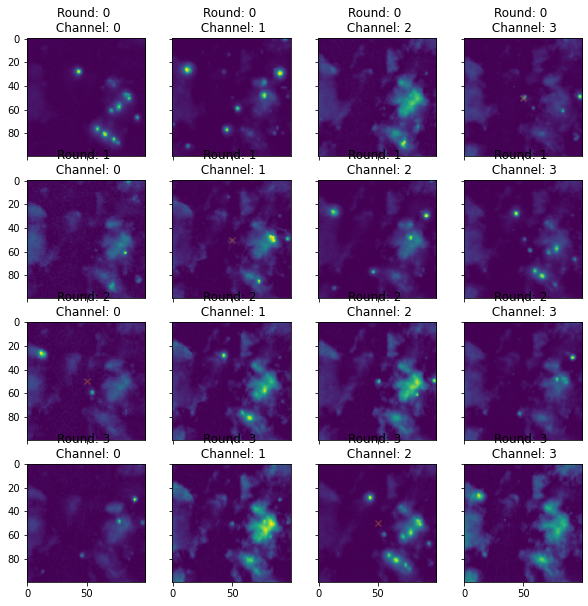

In [175]:
# Here we pretend that the input of our function has already been selected by the user:
plot_trace(images=imgs, center=(500, 600), gene_barcode=[3,1,0,2])

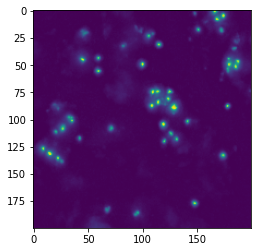

In [38]:
plt.imshow(imgs.sel({Axes.CH:0, Axes.ROUND: 0, Axes.X: (500, 700), Axes.Y: (500, 700)}).xarray.squeeze())


In [54]:
decoded.to_features_dataframe()
#to_csv('˜/Downloads/transcripts.csv', index=False)

,intensity,z,y,x,radius,spot_id,z_min,z_max,y_min,y_max,x_min,x_max,features,xc,yc,zc,target,distance,passes_thresholds
0,0.108783,0,268,596,3.0,0,0,1,266,271,594,599,0,72.234428,57.592378,0.0,CTSL2,0.239190,True
1,0.003821,0,191,367,2.0,1,0,1,190,193,366,369,1,44.479924,41.045314,0.0,VIM,0.351563,True
2,0.001690,0,549,1387,2.0,2,0,1,548,551,1386,1389,2,168.102603,117.978416,0.0,TFRC,0.323395,True
3,0.001680,0,480,811,4.0,3,0,1,477,484,808,815,3,98.292149,103.150527,0.0,RAC1,0.230085,True
4,0.001176,0,318,710,4.0,4,0,1,315,322,707,714,4,86.051080,68.337224,0.0,TP53,0.144652,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0.000090,0,1040,1114,3.0,3993,0,1,1038,1043,1112,1117,3993,135.015356,223.492809,0.0,nan,0.615567,False
3994,0.002359,0,430,1153,2.0,3994,0,1,429,432,1152,1155,3994,139.742106,92.405681,0.0,nan,0.468463,False
3995,0.001548,0,471,821,2.0,3995,0,1,470,473,820,823,3995,99.504136,101.216455,0.0,nan,0.492782,False
3996,0.001840,0,902,758,2.0,3996,0,1,901,904,757,760,3996,91.868618,193.837033,0.0,nan,0.570141,False


In [56]:
features = decoded.to_features_dataframe()

In [55]:
decoded.spot_id.max()

<xarray.DecodedIntensityTable 'spot_id' ()>
array(3997)

In [59]:
features.to_csv("/Users/segonzal/Downloads/delete.csv", index=False)

In [184]:
v = napari.Viewer()
v.add_image(dots.xarray.squeeze())

/Users/segonzal/opt/anaconda3/envs/starfish_napari/lib/python3.7/site-packages/napari/_qt/qt_viewer.py:344: UserWarning: Attempting to unbind an action which does not exists (napari:also_select_layer_above), this may have no effects. This can happen if your settings are out of date, if you upgraded napari, upgraded or deactivated a plugin, or made a typo in in your custom keybinding.
  action_manager.unbind_shortcut(action)
/Users/segonzal/opt/anaconda3/envs/starfish_napari/lib/python3.7/site-packages/napari/_qt/qt_viewer.py:344: UserWarning: Attempting to unbind an action which does not exists (napari:also_select_layer_below), this may have no effects. This can happen if your settings are out of date, if you upgraded napari, upgraded or deactivated a plugin, or made a typo in in your custom keybinding.
  action_manager.unbind_shortcut(action)
/Users/segonzal/opt/anaconda3/envs/starfish_napari/lib/python3.7/site-packages/napari/_qt/qt_viewer.py:344: UserWarning: Attempting to unbind an

<Image layer 'Image' at 0x7fd3dcce9b90>

In [68]:
v.open('/Users/segonzal/Downloads/delete.csv', plugin='napari-spacetx-explorer')

read spots: /Users/segonzal/Downloads/delete.csv


[<Points layer 'delete' at 0x7fd3e81f0d90>]

In [124]:
class PointPlotter:
    def __init__(self, starfish_experiment):
        self.exp = starfish_experiment

    def _get_fov(self, spot_id):
        pass#for i, (name, fov) in enumerate(self.exp.items())

    def get_gene_trace(self, gene):
        gene_index = list(self.exp.codebook.target.data).index(gene)
        barcode = self._get_barcode_from_numpy(self.exp.codebook.data[gene_index])
        return barcode

    def _get_barcode_from_numpy(self, barcode_numpy):
        return [list(l).index(1) for l in barcode_numpy]

In [145]:
spot_attributes.y[0]

268

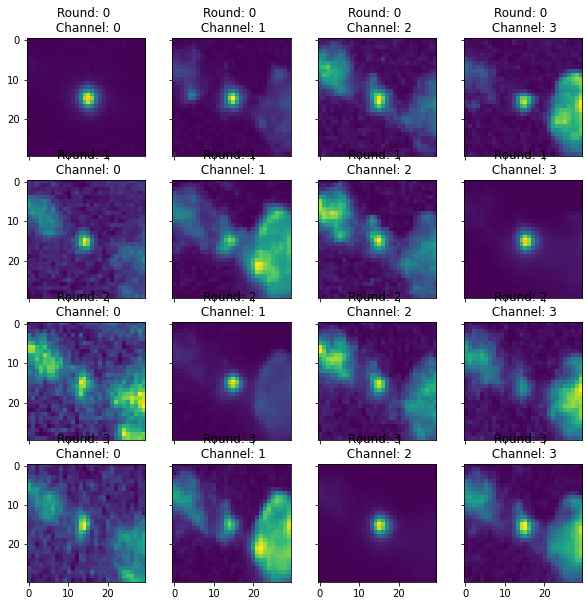

In [182]:
# Testing everything now:
pp = PointPlotter(experiment)
gene_trace = pp.get_gene_trace('CTSL2')

# Here we pretend that the input of our function has already been selected by the user:

# User gives the spot id:
spot_id = 0
spot_attributes = features.loc[features.spot_id == spot_id]
spot_target = spot_attributes.target[0]

pp = PointPlotter(experiment)
gene_trace = pp.get_gene_trace(spot_target)
center = (spot_attributes.x[0], spot_attributes.y[0])

plot_trace(images=imgs, center=center, gene_barcode=gene_trace, width=30, height=30)

In [181]:
650 / 2


325.0

In [126]:
gene_trace = pp.get_gene_trace('CTSL2')

In [137]:
features.loc[features.spot_id == 0]


,intensity,z,y,x,radius,spot_id,z_min,z_max,y_min,y_max,x_min,x_max,features,xc,yc,zc,target,distance,passes_thresholds
0,0.108783,0,268,596,3.0,0,0,1,266,271,594,599,0,72.234428,57.592378,0.0,CTSL2,0.23919,True


In [183]:
import napari
viewer = napari.Viewer()


/Users/segonzal/opt/anaconda3/envs/starfish_napari/lib/python3.7/site-packages/napari/_qt/qt_viewer.py:344: UserWarning: Attempting to unbind an action which does not exists (napari:also_select_layer_above), this may have no effects. This can happen if your settings are out of date, if you upgraded napari, upgraded or deactivated a plugin, or made a typo in in your custom keybinding.
  action_manager.unbind_shortcut(action)
/Users/segonzal/opt/anaconda3/envs/starfish_napari/lib/python3.7/site-packages/napari/_qt/qt_viewer.py:344: UserWarning: Attempting to unbind an action which does not exists (napari:also_select_layer_below), this may have no effects. This can happen if your settings are out of date, if you upgraded napari, upgraded or deactivated a plugin, or made a typo in in your custom keybinding.
  action_manager.unbind_shortcut(action)
/Users/segonzal/opt/anaconda3/envs/starfish_napari/lib/python3.7/site-packages/napari/_qt/qt_viewer.py:344: UserWarning: Attempting to unbind an

In [185]:
viewer

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 0.0, 0.0), zoom=1.0, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0, 2, 1), (0, 2, 1)), current_step=(0, 0), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ]), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertices=False, selection_box_drag=None, selection_box_final=None, transform_start=<napari.utils.transforms.tran